# DTSA-5509 Likelihood of Cervical Cancer Based on Health Factors
## Final Project  - 6/27/2023
# Introduction

Cervical cancer is a type of malignant growth that occurs in the cells of the cervix, the lower part of the uterus that connects to the vagina. It's primarily caused by persistent infection with certain strains of human papillomavirus (HPV) (American Cancer Society, 2021[1]). The potential impact of cervical cancer on women's health, quality of life, and survival rates is significant, and risks include metastasis, decreased fertility, and complications during pregnancy (National Cancer Institute, 2021[2]). However, if detected early, cervical cancer can be effectively treated or even prevented (Centers for Disease Control and Prevention, 2021[3]). Therefore, the capacity to predict cervical cancer risk is of utmost importance. The use of predictive models could enable timely interventions and, in conjunction with preventive measures like regular screenings and HPV vaccinations, significantly reduce the incidence and mortality associated with this disease (World Health Organization, 2020[4]).

# Project Goal
The ensuing project aims to develop a predictive model capable of identifying potential cases of cervical cancer in female patients, based on an analysis of 30 integral factors. Such a model would significantly aid medical professionals in pinpointing patients at risk, enabling a streamlined series of diagnostics that would guide doctors in determining appropriate preventative care measures. This strategic approach fosters early detection of cancer, thereby contributing to a substantial decrease in mortality rates. Furthermore, it assists in the optimization of healthcare expenditure, promoting overall cost-effectiveness.

This is a binary classification problem that will predict (based on the predictors used in this project) if a user has / or does not have cervical cancer. We will use the machine learning techiques to helps us provide a tool which will help predict this information and provide patients.


In [45]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


## Import Data

The following data was pulled from [UCI Machine Learning Databank](https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors) called Cervical cancer (Risk Factors) and added in 3/2017.

The data[5] was collected in Caracas, Venezuela at Hospital Universitario de Carcas from 858 patients. According to the authors, the data was collected from on multiple sources including demographic data, habits and medical records of the patients.

There are 35 features in total, 24 categorical features and 11 numerical features.

As any dataset, there are a few things missing from the data.

In [46]:
# import data into ide
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
path = "/content/drive/MyDrive/Colab Notebooks/Unsupervised Machine Learning/Final Project/risk_factors_cervical_cancer.csv"
risk_cancer_data = pd.read_csv(path)

In [48]:
risk_cancer_data.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# Data Cleaning

## Rename columns
Following are the original columns and thus we will rename them to make a a bit easier to work with. This doesn't really change much to the analysis but it does help when working with the parameters in context of doing the data exploration of this dataset.

In [49]:
org_risk_cancer_col = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy']

risk_cancer_col = ['Age','SexualPartners','FirstSexAge','Pregnancies', 'Smokes', 'SmokesYr', 'SmokesPacks',
      'HormCont', 'HormContYr','IUD','IUDYr','STD','STDNum','Condylomatosis',
      'CervicalCondylomatosis','VaginalCondylomatosis','VulvoPerinealCondylomatosis', 'Syphilis',
      'PelvicInflamDis', 'GenitalHerpes','MolluscumContagiosum', 'AIDS', 'HIV',
      'HepB', 'HPV', 'NumDiag', 'TimeFirstDiag', 'TimeLastDiag', 'DxCancer',
      'DxCIN','DxHPV','Dx','Hinselmann','Schiller', 'Citology', 'Biopsy']

risk_cancer_data.columns = risk_cancer_col

## Fill / Remove Null
The first thing we need to do is simply look at the data an determine what needs to be pulled out of the dataset.

In [50]:
# Check for null characters within the dataset
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
# prints number of null values detected by .isnull() and string none
for c in risk_cancer_data.columns:
    string_null = np.array([x in a[2:] for x in risk_cancer_data[c]])
    print(c, risk_cancer_data[c].isnull().sum(), string_null.sum())

Age 0 0
SexualPartners 0 26
FirstSexAge 0 7
Pregnancies 0 56
Smokes 0 13
SmokesYr 0 13
SmokesPacks 0 13
HormCont 0 108
HormContYr 0 108
IUD 0 117
IUDYr 0 117
STD 0 105
STDNum 0 105
Condylomatosis 0 105
CervicalCondylomatosis 0 105
VaginalCondylomatosis 0 105
VulvoPerinealCondylomatosis 0 105
Syphilis 0 105
PelvicInflamDis 0 105
GenitalHerpes 0 105
MolluscumContagiosum 0 105
AIDS 0 105
HIV 0 105
HepB 0 105
HPV 0 105
NumDiag 0 0
TimeFirstDiag 0 787
TimeLastDiag 0 787
DxCancer 0 0
DxCIN 0 0
DxHPV 0 0
Dx 0 0
Hinselmann 0 0
Schiller 0 0
Citology 0 0
Biopsy 0 0


### Analysis
The first thing based on the nulls in the dataset:
* the first thing that jumps out that 787 missing samples for TimeFirstDiag and TimeLastDiag and thus we don't have much value that can be gained from the dataset.
* For the diagnosis features such as *Syphilis*, *PelvicInflamDis* these features are important to look into further as there are 105 null. These features do make up of about 13% of the entire dataset.



In [51]:
# Remove largely missing sample parameters
cols_to_drop = ['TimeFirstDiag', 'TimeLastDiag', 'NumDiag', 'STDNum']
for col in cols_to_drop:
  risk_cancer_data = risk_cancer_data.drop(col,  axis=1)

# Removes 105 nulls that are equal across the patient population. There is so little information otherwise
null_arr = []
for c in ['HIV']:
    string_null = np.array([x in a[2:] for x in risk_cancer_data[c]])
    null_arr = string_null


In [52]:

risk_cancer_data = risk_cancer_data[null_arr == False]

# Convert original data to df
df = risk_cancer_data
cols_need_change = df.select_dtypes(include=[object])
for col in cols_need_change:
  df[col] = df[col].apply(pd.to_numeric, errors='coerce')

<ipython-input-52-7009bff91073>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(pd.to_numeric, errors='coerce')


## Convert parameters to categorical
After looking at the data that was imported and converting the columns to numeric,it was going to be important to change the columns to the proper data type to make sure that when starting some of the data exploration I have the right data showing up.

In [53]:
col_change = ['Smokes','HormCont','IUD','Condylomatosis','CervicalCondylomatosis','VaginalCondylomatosis',
              'Syphilis','PelvicInflamDis','GenitalHerpes','MolluscumContagiosum','AIDS','HIV','HepB','DxCIN',
              'DxHPV','Dx','Hinselmann','Schiller','Citology','Biopsy','VulvoPerinealCondylomatosis', 'HPV',
               'DxCancer','STD']

for col in col_change:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          753 non-null    int64   
 1   SexualPartners               739 non-null    float64 
 2   FirstSexAge                  747 non-null    float64 
 3   Pregnancies                  706 non-null    float64 
 4   Smokes                       743 non-null    category
 5   SmokesYr                     743 non-null    float64 
 6   SmokesPacks                  743 non-null    float64 
 7   HormCont                     740 non-null    category
 8   HormContYr                   740 non-null    float64 
 9   IUD                          737 non-null    category
 10  IUDYr                        737 non-null    float64 
 11  STD                          753 non-null    category
 12  Condylomatosis               753 non-null    category
 13  Cervi

<ipython-input-53-b82b025133be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')


In [54]:

# Fill NaN values with the mean of the column  ######################################
for col in df.columns:
  if df[col].dtypes == 'category':
    #print(col, "category")
    df[col] = df[col].fillna(0)
  else:
    #print(col, "mean")
    df[col] = df[col].fillna(df[col].mean())


Need to update the categories  to insure that the averages are updated properly

In [55]:
risk_cancer_data[['Biopsy','Age']].groupby('Biopsy').count()

,Age
Biopsy,
0,700
1,53


### Summary
In the section, we first renamed columns or order to better access the information, and prepare it for being able to build a model that can help predict the information necessary.

## Data Exploration

In order to have a better sense on what is in the dataset, we can use the following discover as a method to help improve our understand of the data and its nuance. We need to first understand the data and the distribution within the dataset.

### Covariance Matrix
The first thing we will realize is that these are numerical factors that we are looking at and will need to use some other exploratory analysis with the other variables.

<ipython-input-56-3007d2d7d84e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


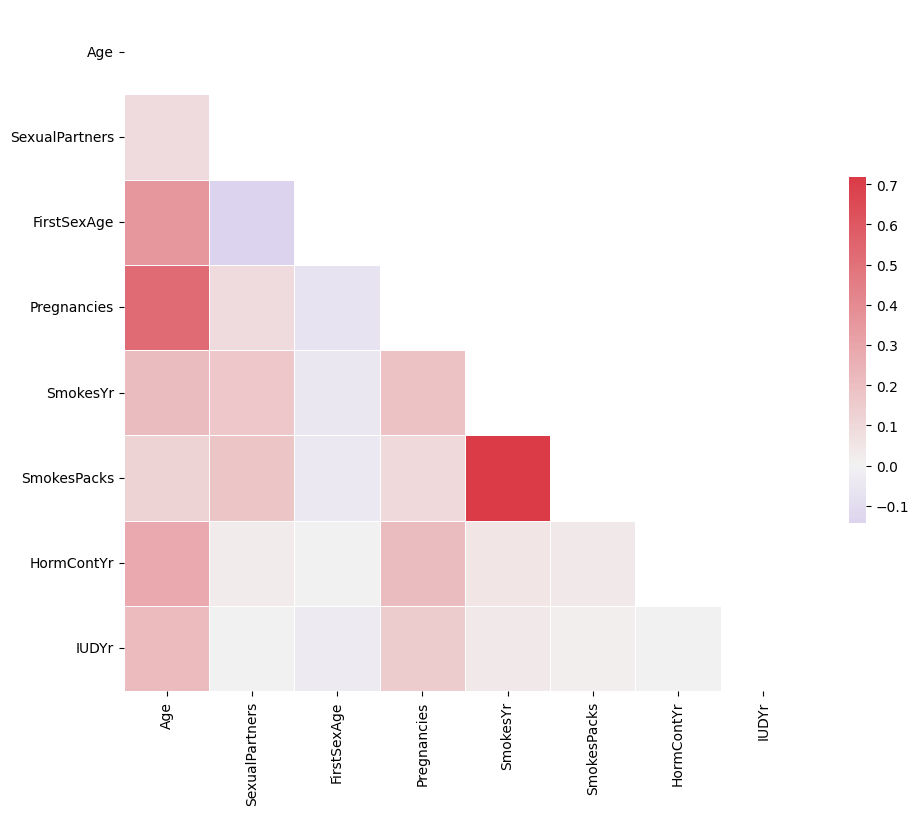

In [56]:
# practice visualizing correlation matrix using a heatmap
# your code here
corr = df.corr()
msk = np.triu(np.ones_like(corr,dtype=bool))
(f,ax) = plt.subplots(figsize=(11,9))
color_map = sns.diverging_palette(275,10,as_cmap=True)
sns.heatmap(corr, mask = msk, cmap = color_map, center=0, square =True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Analysis
A few interesting observations can be seen from the correlation matrix:

* There is a high correlation between pregnancies and age.. this correlation makes sense as the older one is, the more pregancies a woman can have over the period of child bearing years.

* FirstSexAge has a slight negative correlation between SexualPartners, I am not sure how that might intuitively make sense

* For FirstSexAge and Pregnancies, we see that there is also a slight negative correlation. This might make sense as the earlier the first sexual encounter and pregnancy.

In [57]:
df.describe()

,Age,SexualPartners,FirstSexAge,Pregnancies,SmokesYr,SmokesPacks,HormContYr,IUDYr
count,753.00000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,27.22842,2.529093,17.089692,2.317280,1.227273,0.464308,2.212019,0.517598
std,8.68086,1.668754,2.832418,1.424019,4.112761,2.286275,3.602984,1.927155
min,13.00000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.00000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,26.00000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000
75%,33.00000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000
max,84.00000,28.000000,32.000000,11.000000,37.000000,37.000000,22.000000,19.000000


We have seen the following:

* We see that the most pregancies was 11 pregnancies, where the average was 2.3 pregnancies.
* The average IUD was implanted for ~2 years, however a max was 19 years.

### Scatterplot / Histogram Insights
The following scatterplots and histograms have been used to help gain a better understanding over the data that we are using. This should give us intuition on what features should either be imputed or removed.

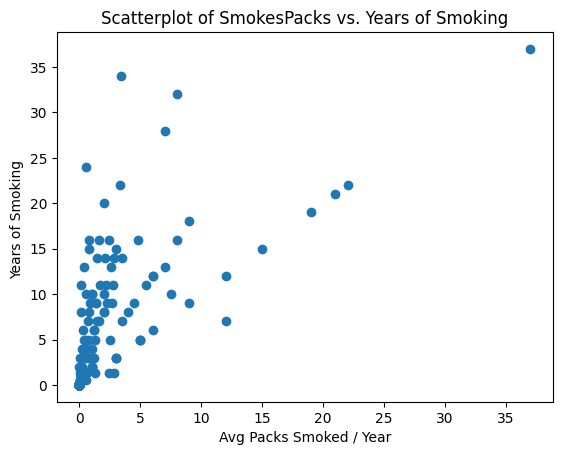

In [58]:
plt.scatter(df['SmokesPacks'], df['SmokesYr'])
plt.title("Scatterplot of SmokesPacks vs. Years of Smoking")
plt.xlabel("Avg Packs Smoked / Year")
plt.ylabel("Years of Smoking ")
plt.show()

We see that there is definitely a line of linearity between how many years having smoked and how many packs the individual has been smoking. This coincides with the correlation that we saw earlier in the analysis above.

## Pairwise Plot
A pairwise plot (also known as a pair plot) is a matrix of scatterplots that allows us to visualize the pairwise relationships and correlations between different variables in a dataset. This plot is useful in understanding the distribution of single variables and relationships between two variables.

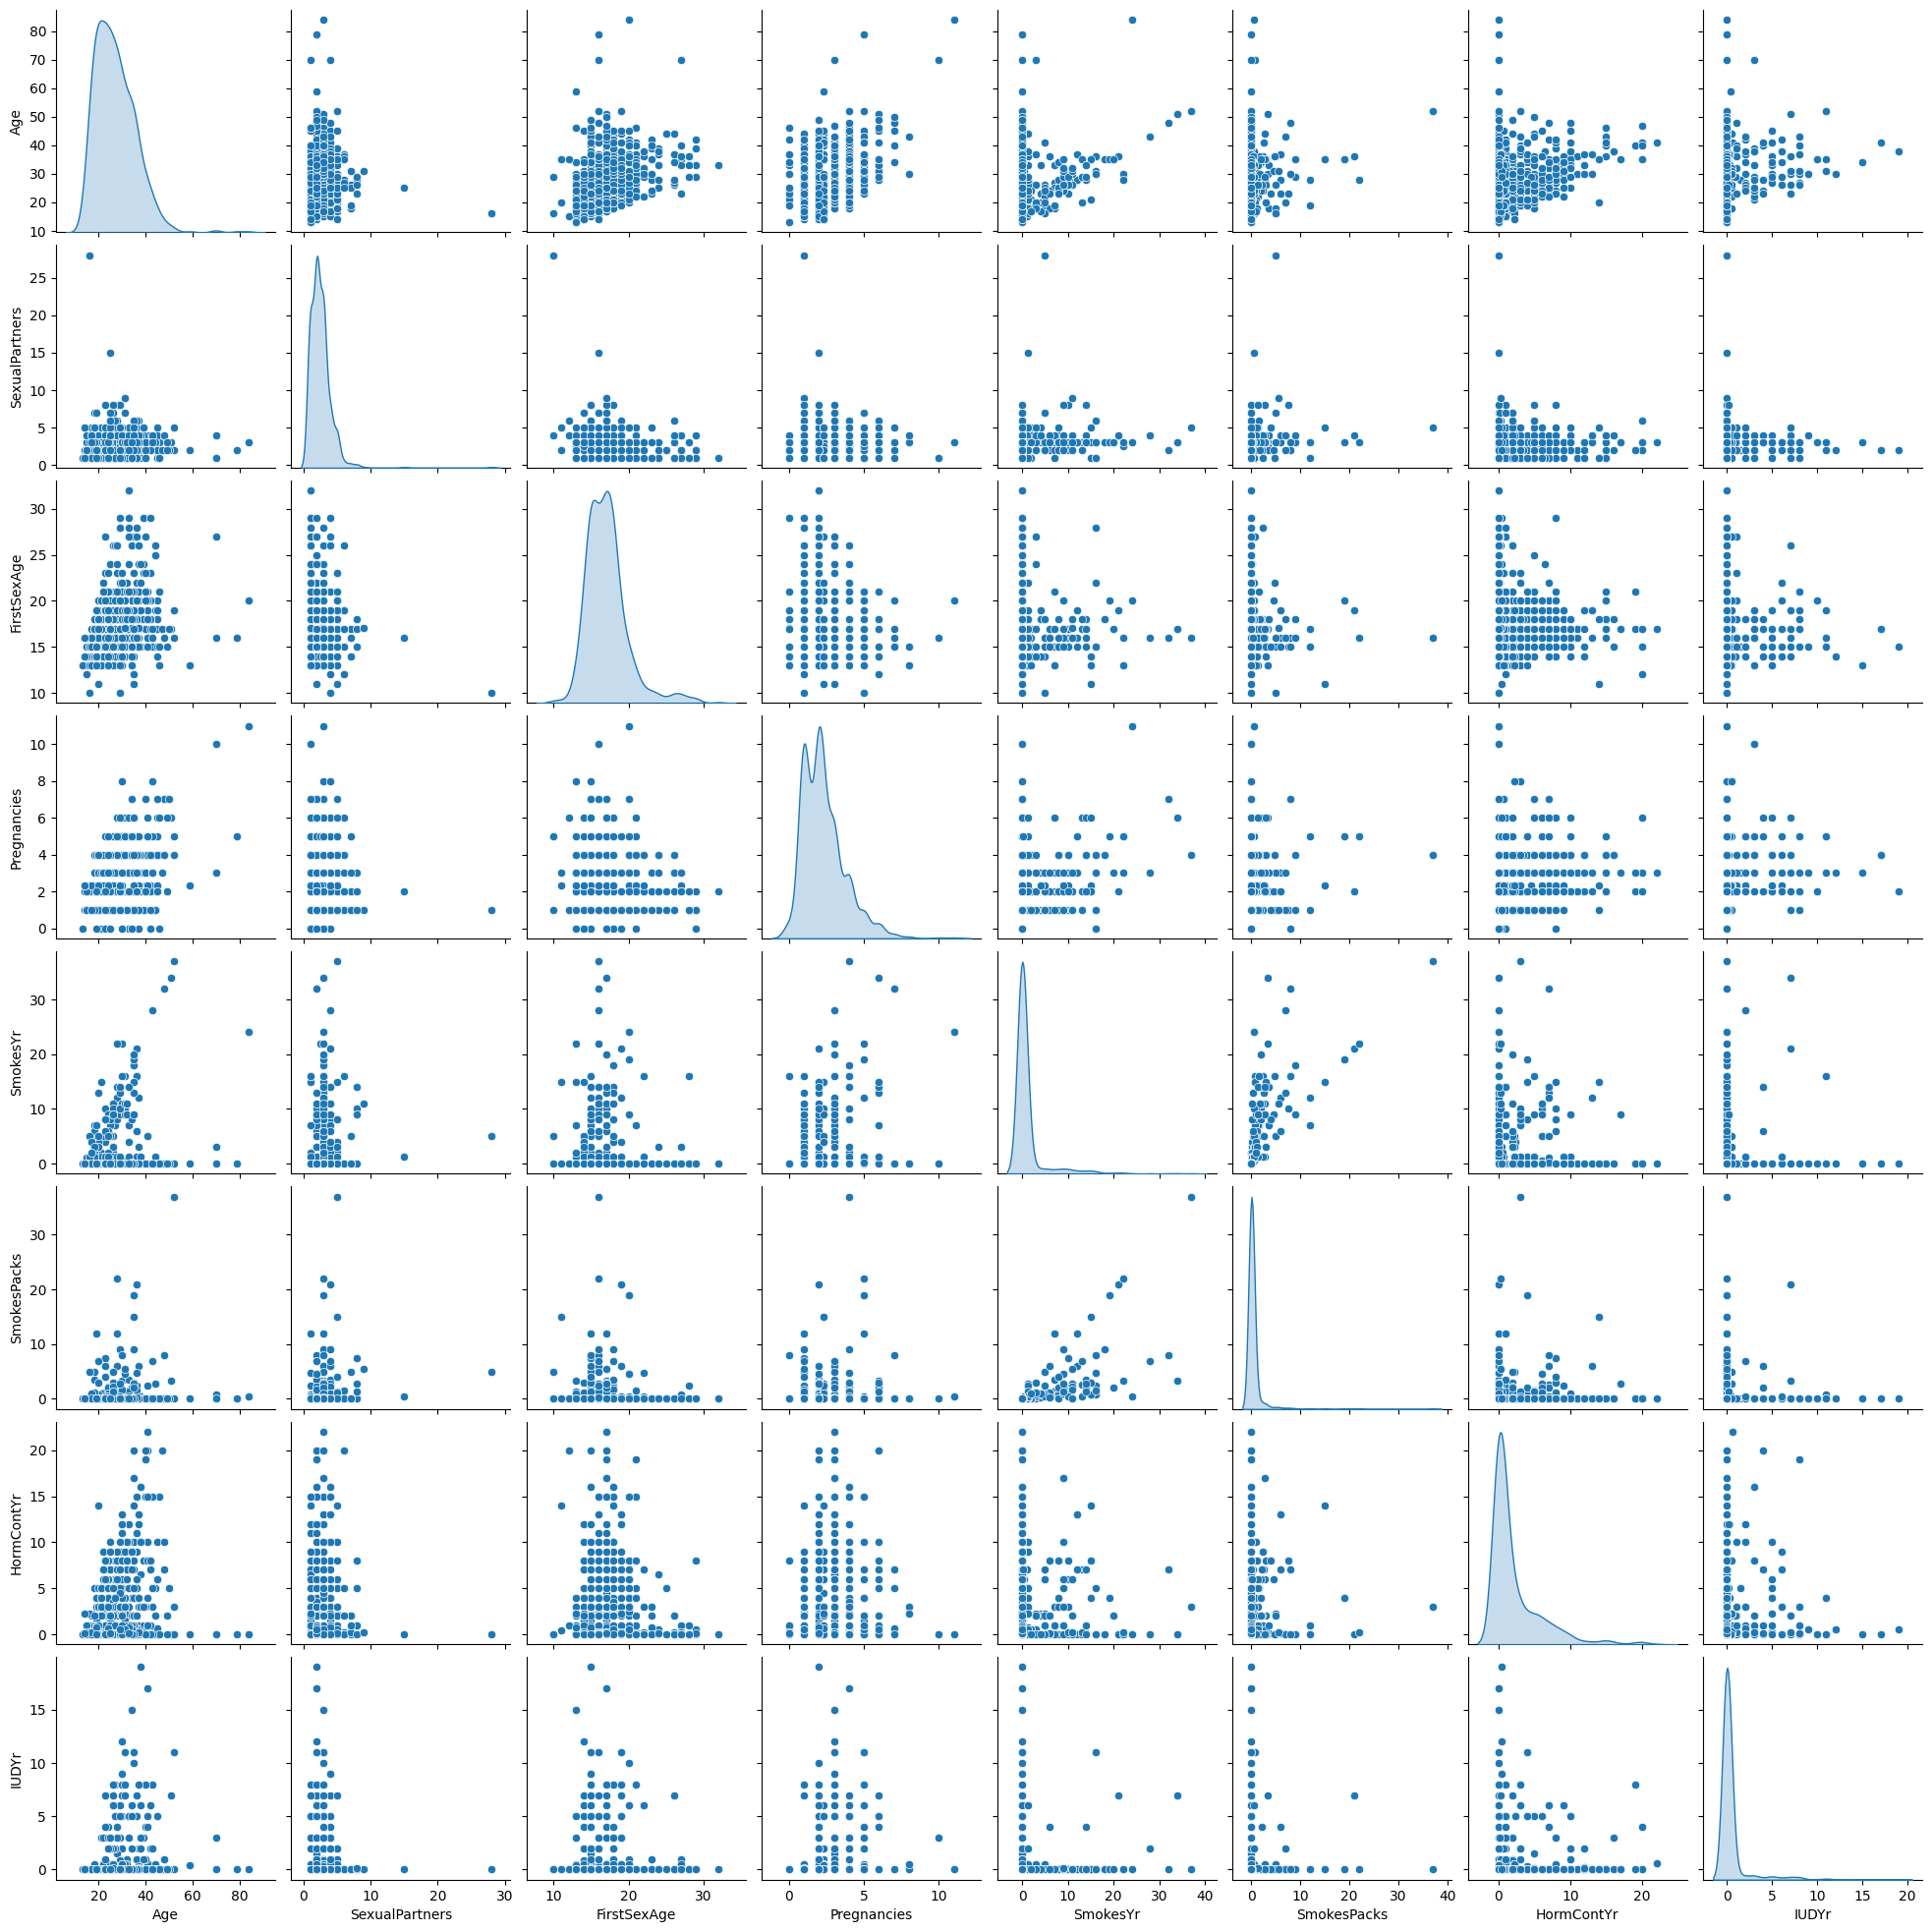

In [59]:
df_sub = df
pairdata = df_sub.copy(deep = True)
sns.pairplot(pairdata, diag_kind = "kde")

#### Analysis

Based on this pairwise analysis, we are looking at the numerical columns that the correlation analysis was done above. We see some interesting distributions of data. The following trends have been noted below:

**Outliers**
* In the *SexualPartners*, we see that there are two outliers where the partners are >= about 15 partners.
* In *SmokesPacks* we see that there is one individual who smokes over 30 packs which is much higher than the

## Categorical Analysis
This dataset is heavy in boolean and categorical information. The following plots where used to try to find any interesting features that could help better understand the data.

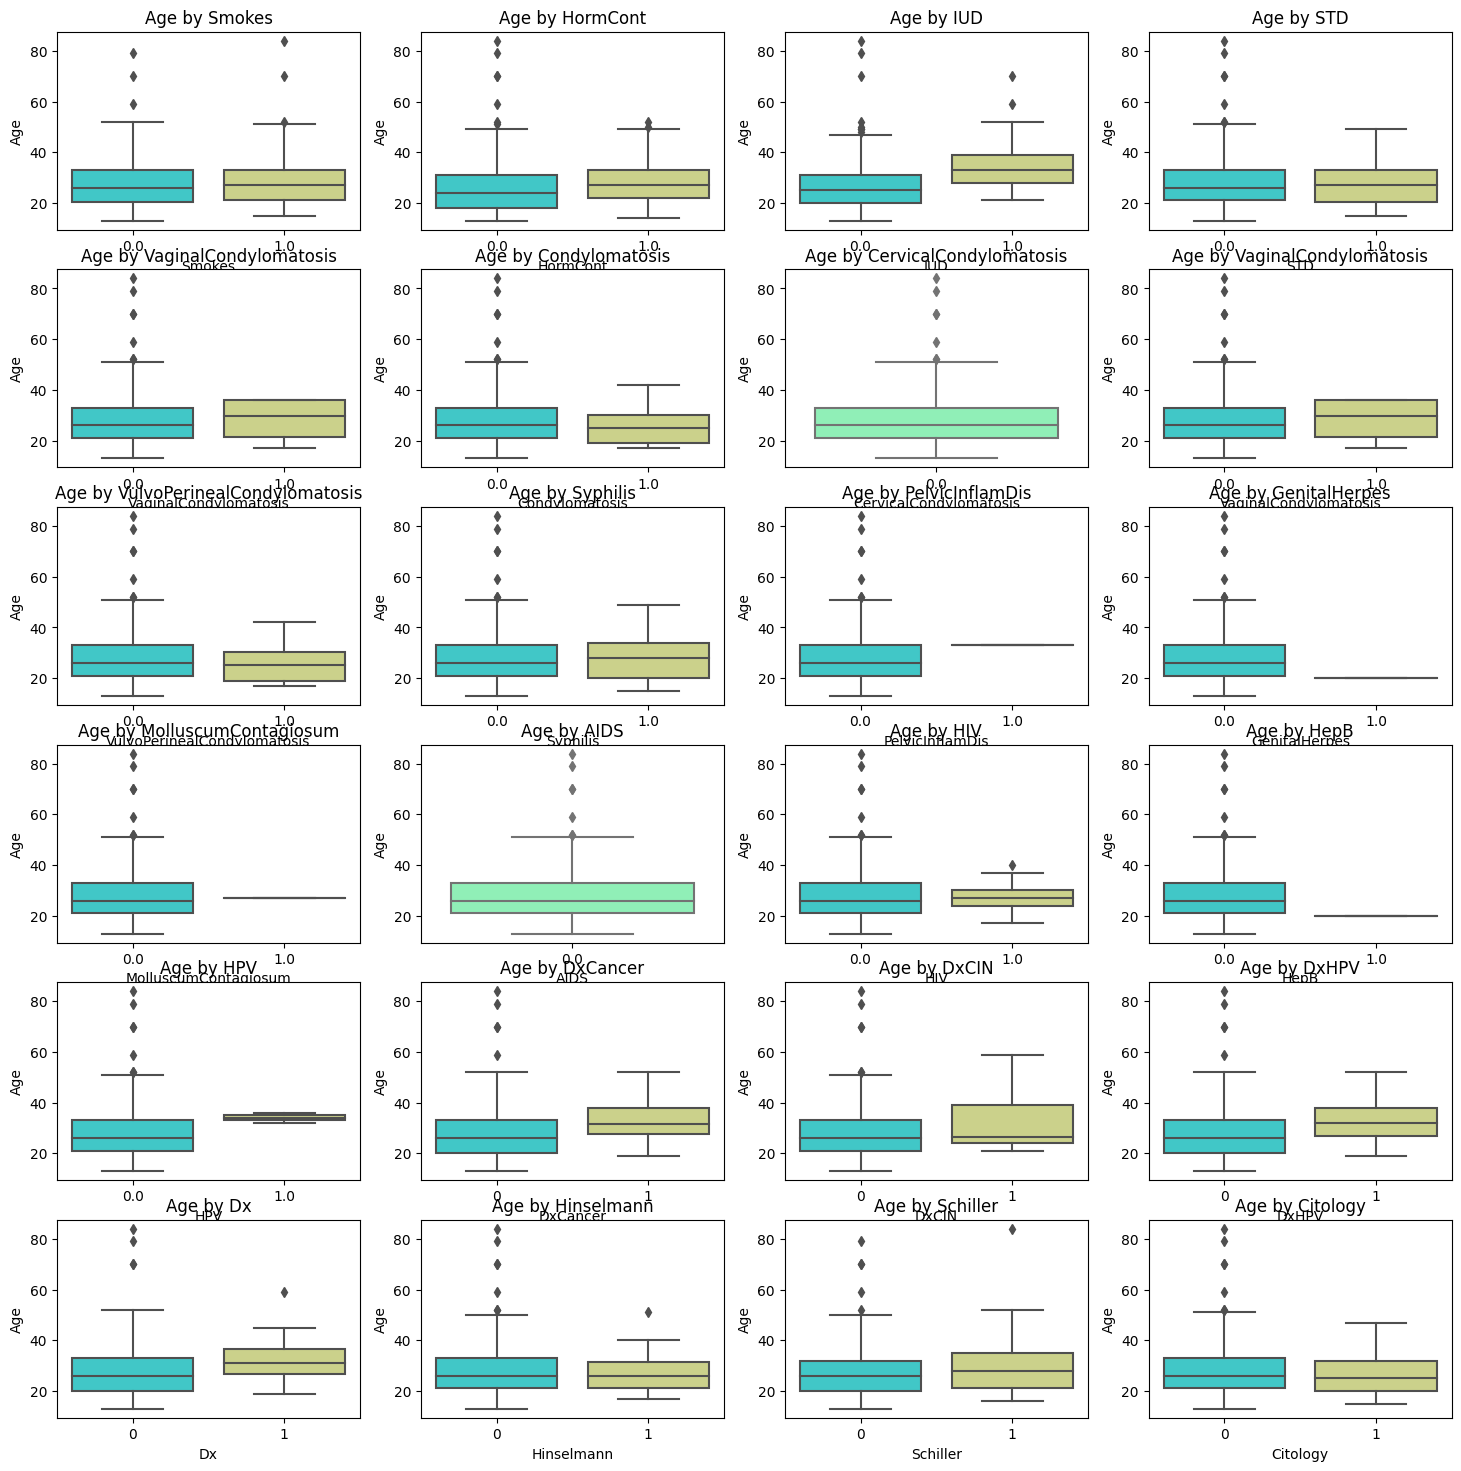

In [60]:
disease = [ 'Smokes', 'HormCont','IUD','STD',
           'VaginalCondylomatosis','Condylomatosis', 'CervicalCondylomatosis',
            'VaginalCondylomatosis','VulvoPerinealCondylomatosis', 'Syphilis',
       'PelvicInflamDis', 'GenitalHerpes',
       'MolluscumContagiosum', 'AIDS', 'HIV',
       'HepB', 'HPV', 'DxCancer', 'DxCIN', 'DxHPV', 'Dx','Hinselmann','Schiller',
            'Citology', 'Biopsy']
n = 0

# Set Row / column
m = 6
k = 4

fig, axs = plt.subplots(m,k, figsize=(18,18))
for i in range(m):
  for j in range(k):
    col = disease[n]
    sns.boxplot(x=col, y='Age',data=df,palette='rainbow', ax=axs[i,j])
    axs[i,j].set_title("Age by " + col)
    n = n+1
#sns.swarmplot(x=dis,y='Age', dodge=True,data=df, alpha=.8,color='grey',s=4)


plt.show()

### Analysis
The following gives us a better understanding and find that there are a number of these columns that don't bring much information. We have used Age as the Y axis to provide a distribution of the data. Some of the things that are observed:

* We see that there are two categorical predictors that only have no positive features (*AIDS*, *CervicalCondylomatosis*). This cannot bring additional information to the current model.

* *PelvicInflamDis*, *GenitalHerpes*, *MolluscumContagiosum*, *HepB* all have these predictors also have very little information to be gained.

* There doesn't seem to be any noticable associations with age and any of the boolean parameters.

* None of the boolean parameters show a statical difference based on the age of the individual.

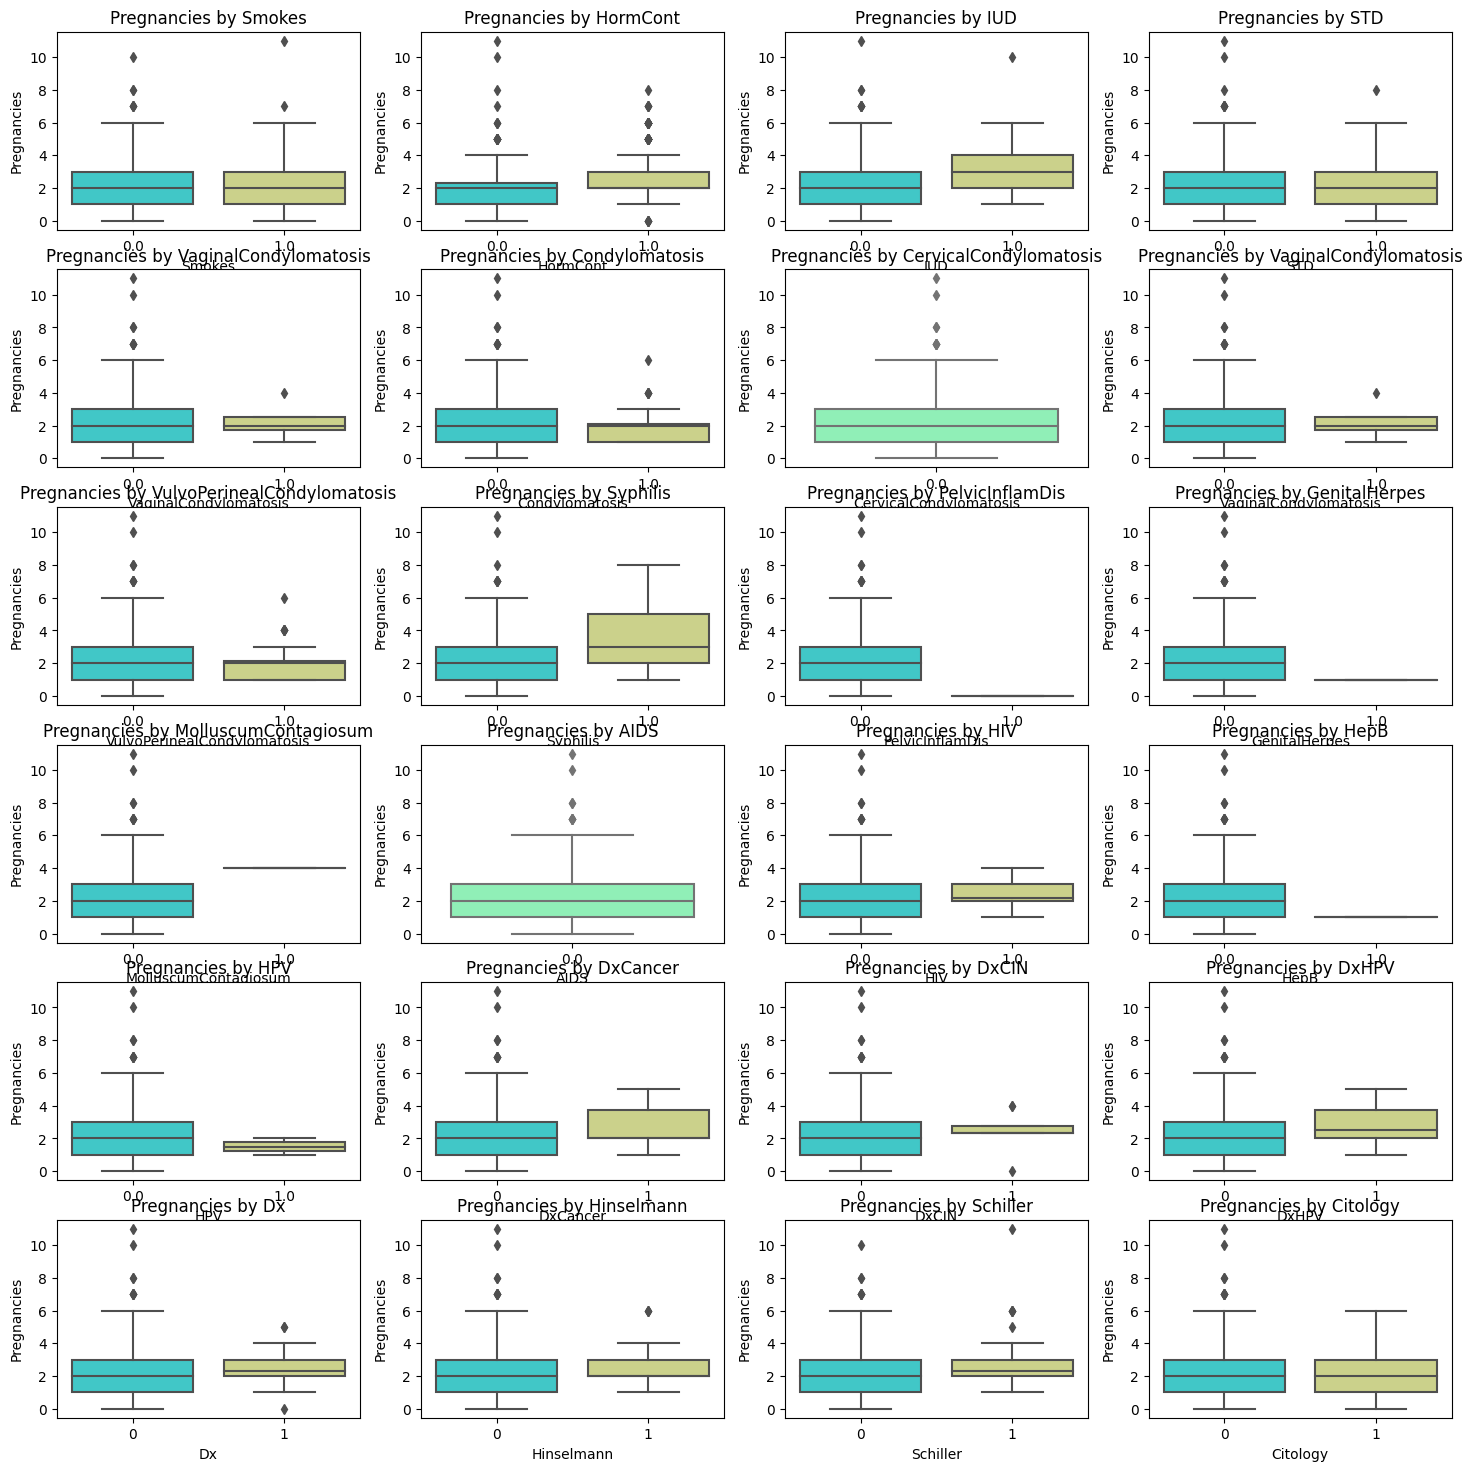

In [61]:
n = 0

# Set Row / column
m = 6
k = 4
fig, axs = plt.subplots(m,k, figsize=(18,18))
for i in range(m):
  for j in range(k):
    col = disease[n]
    sns.boxplot(x=col, y='Pregnancies',data=df,palette='rainbow', ax=axs[i,j])
    axs[i,j].set_title("Pregnancies by " + col)
    n = n+1
plt.show()

#### Analysis
We chose pregnancies due to the distribution being one of the wider and perhaps a way to further understand the interactions between pregancies. Unfortunately, it appears that for none of these features we will find  statistical significance between with / without the certain boolean predictor.


In [62]:
summary = pd.DataFrame()
for col in disease:
    summary[col] = df[col].value_counts()
summary = summary.transpose()
print(summary)

                               0.0    1.0
Smokes                       646.0  107.0
HormCont                     281.0  472.0
IUD                          670.0   83.0
STD                          674.0   79.0
VaginalCondylomatosis        749.0    4.0
Condylomatosis               709.0   44.0
CervicalCondylomatosis       753.0    NaN
VulvoPerinealCondylomatosis  710.0   43.0
Syphilis                     735.0   18.0
PelvicInflamDis              752.0    1.0
GenitalHerpes                752.0    1.0
MolluscumContagiosum         752.0    1.0
AIDS                         753.0    NaN
HIV                          735.0   18.0
HepB                         752.0    1.0
HPV                          751.0    2.0
DxCancer                     735.0   18.0
DxCIN                        745.0    8.0
DxHPV                        735.0   18.0
Dx                           730.0   23.0
Hinselmann                   718.0   35.0
Schiller                     680.0   73.0
Citology                     712.0

# Model Pre-processing
One of the first things we noticed was that there is a much smaller sample size where the Cervical Cancer biopsy is true.

Following we are going to upsample the minority class to match the number of samples in the majority class before training the model. This can help to improve the model's performance on the minority class, at the risk of increasing the likelihood of overfitting to the minority class. Be sure to test the model and adjust as necessary for your specific use case.

The resample function is a simple way to balance your data but it might not be the optimal one. In practice, simple random oversampling can lead to overfitting due to the replication of data points.

### Checking for Colinearity
In the context of regression analysis, Variance Inflation Factor (VIF) is a metric that quantifies the extent of multicollinearity in a set of multiple regression variables. Multicollinearity is the phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

VIF is calculated by taking a predictor variable and regressing it against every other predictor variable in the model. The resulting R-squared value (which represents the proportion of variance in the considered predictor that can be explained by the other predictors) is then used to calculate the VIF for that particular predictor variable.

In essence, VIF provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of multicollinearity.

When VIF is equal to 1, this indicates that the predictor variable is not correlated with any other variables in the model. As the VIF for a predictor variable increases, it means that the predictor variable is highly collinear with the other variables.

A common rule of thumb is that if VIF > 5 or 10, then the multicollinearity is high and you may want to consider dropping that predictor variable from the model to improve it, as high multicollinearity can make your model unstable and the standard errors for your coefficient estimates unreliable.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def get_vif(df):
  # Define your features
  X_VIF = df[df.columns]

  # Add a constant to the array for the intercept
  X_VIF= sm.add_constant(X_VIF)

  # Calculate VIF for each feature
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
  vif["features"] = X_VIF.columns

  return vif.sort_values('VIF Factor', ascending = False)

get_vif(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
13,64.830140,Condylomatosis
16,56.211775,VulvoPerinealCondylomatosis
0,49.535518,const
12,13.131113,STD
25,7.147749,DxCancer
28,6.529330,Dx
27,5.000388,DxHPV
6,3.720308,SmokesYr
17,3.435868,Syphilis
26,3.414356,DxCIN


Based on the VIF factors and where we find colinearity, we will use to remove the higher colinear parameters to give us the ability to create models that are going to provide the best

In [64]:
rem_vif_col = ['VaginalCondylomatosis','VulvoPerinealCondylomatosis','STD','DxCancer','Dx']

for col in rem_vif_col:
  if col in df.columns:
    df = df.drop(col, axis=1)

In [65]:

## Resampled the data ######################################
df_majority = df[df.Biopsy == 0]
df_minority = df[df.Biopsy  == 1]

df_minority_upscaled = resample(df_minority, replace=True,n_samples=len(df_majority), random_state =42)
df_upsampled = pd.concat([df_majority, df_minority_upscaled])

# Set the Y
y_var = 'Biopsy'
#'Hinselmann','Schiller','Citology',
y_var_col = ['Biopsy']

# Fill NaN values with the mean of the column  ######################################
df_upsampled.fillna(df_upsampled.mean(), inplace=True)

# Define target variable, for example 'Biopsy'  ######################################
y = df_upsampled[y_var]
X = df_upsampled

# Define features, here we exclude 'Biopsy' from the features  ######################################
for col in y_var_col:
  X = X.drop(col, axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-65-23de2809af52>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_upsampled.fillna(df_upsampled.mean(), inplace=True)


# Model Building

I've detailed the process on running two separate models (decision tree and random forest). Since these models are similar in process and since this is a classification problem with a number of boolean features; I felt that this would be a good route to analyze the data to generate a prediction model.

### Decision Tree
In the realm of classification tasks, I have discovered that decision tree models serve as extremely beneficial tools, particularly in understanding the significance of various features within our dataset. This is largely due to the innate characteristics of decision trees, which inherently evaluate and rank the importance of different features based on their contribution to the overall predictive power of the model. As we traverse through the branches of the decision tree, we can observe how the algorithm splits or segments the data based on distinct feature values. These splits are insightful as they demonstrate how the model interprets and utilises the features to make accurate predictions. Moreover, the decision tree's ability to provide a clear and comprehensible visual representation of its decision-making process sets it apart from many other models. This not only helps in gaining a better understanding of our data but also allows us to explain the model's decisions in a way that is easily interpretable, even for non-technical stakeholders. Therefore, the use of decision trees in classification tasks not only aids in predictive accuracy but also enhances our understanding of the underlying data and the model's decision-making process.

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
train_acc_scores = []
test_acc_scores = []
train_f1_scores = []
test_f1_scores = []
models = []
max_depth = range(1,20)
max_leaf_nodes = range(2,34)

# Initialize Decision Tree model

for md in max_depth:
  model = DecisionTreeClassifier(max_depth = md, random_state=42)

  # Train model
  model.fit(X_train, y_train)
  models.append(model)

  # Make predictions
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  train_acc_scores.append(model.score(X_test, y_test))
  test_acc_scores.append(model.score(X_train, y_train))
  train_f1_scores.append(f1_score(y_test, y_test_pred))
  test_f1_scores.append(f1_score(y_train, y_train_pred))


dt_model = {
    'models': models,
    'max_depth': max_depth,
    'test_acc': test_acc_scores,
    'test_f1_scores': test_f1_scores
}


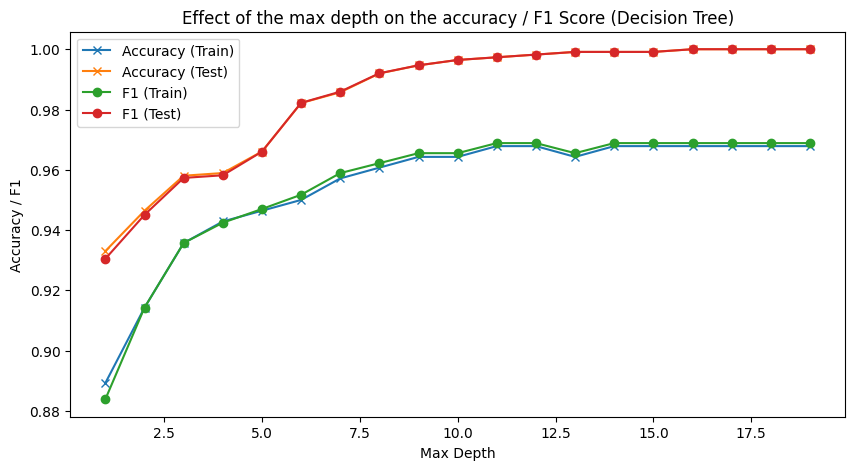

In [73]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(max_depth, train_acc_scores, marker='x', label="Accuracy (Train)")
plt.plot(max_depth, test_acc_scores, marker='x',label='Accuracy (Test)')
plt.plot(max_depth, train_f1_scores, marker='o', label="F1 (Train)")
plt.plot(max_depth, test_f1_scores, marker='o',label='F1 (Test)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy / F1')
plt.title('Effect of the max depth on the accuracy / F1 Score (Decision Tree)')
plt.legend()
plt.show()

As we can see from both the accuracy and F1 of the hyperparmeters, we see that there is a leveling out as the max depth was increased over the the models that have been built. We can see how this changes as the max depth is increased by looking at the plot of the decision tree. This gives us intution on how the model had selected the various decision points within the data. In the example below we look at our model where max depth is set to 10, we can visually see the internals of the model which does help provide us an explainable model.

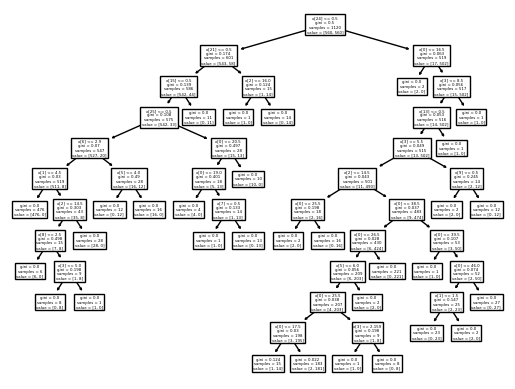

In [74]:
tree.plot_tree(dt_model['models'][10])
plt.show()

Part of being able to understand the model that is being built, being able to follow the way the model has created

In [69]:

train_acc_scores = []
test_acc_scores = []
train_f1_scores = []
test_f1_scores = []

max_leaf_nodes = range(2,34)

# Initialize Decision Tree model

for md in max_leaf_nodes:
  model = DecisionTreeClassifier(max_depth = 11,  max_leaf_nodes = md, random_state=42)

  # Train model
  model.fit(X_train, y_train)

  # Make predictions
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  train_acc_scores.append(model.score(X_test, y_test))
  test_acc_scores.append(model.score(X_train, y_train))
  train_f1_scores.append(f1_score(y_test, y_test_pred))
  test_f1_scores.append(f1_score(y_train, y_train_pred))



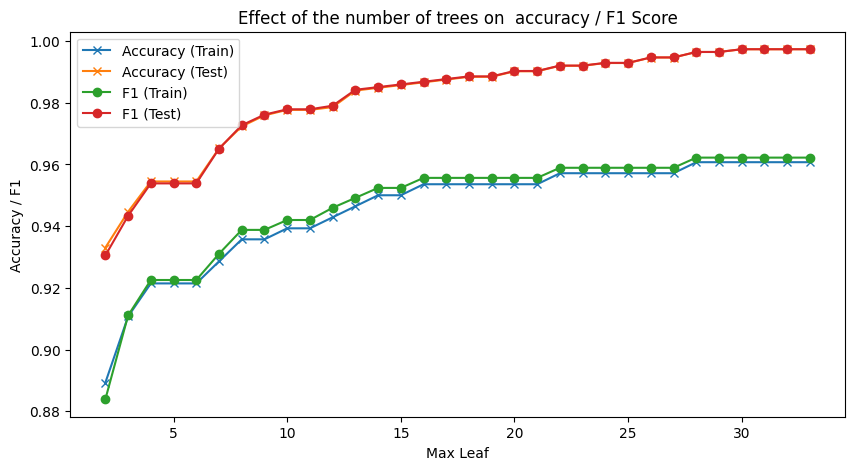

In [70]:
plt.figure(figsize=(10, 5))

plt.plot(max_leaf_nodes, train_acc_scores, marker='x', label="Accuracy (Train)")
plt.plot(max_leaf_nodes, test_acc_scores, marker='x',label='Accuracy (Test)')
plt.plot(max_leaf_nodes, train_f1_scores, marker='o', label="F1 (Train)")
plt.plot(max_leaf_nodes, test_f1_scores, marker='o',label='F1 (Test)')
plt.xlabel('Max Leaf')
plt.ylabel('Accuracy / F1')
plt.title('Effect of the number of trees on  accuracy / F1 Score')
plt.legend()
plt.show()

#### Grid Search (Decision Tree)

We have run a few simulations above to understand the operation of the models in terms of the hyperparameters of max depth of the tree and the min samples per leaf. We used Grid Search Cross Validation to scan across these parameters to find the best fitting model.

In [357]:
from sklearn.model_selection import GridSearchCV
rf = DecisionTreeClassifier()
param = {'max_depth': max_depth, 'min_samples_leaf':max_leaf_nodes}
clf = GridSearchCV(rf, param)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Best Estimator:', clf.best_estimator_)
print('Best Score:',clf.best_score_)

Best Estimator: DecisionTreeClassifier(max_depth=9, min_samples_leaf=2)
Best Score: 0.9839285714285714


In [358]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[127  13]
 [  0 140]]


### Random Forest

Random forest gives us another method to provide classification of the data. Since there are so many boolean parameters, decision trees and random forests are ideal model candidates based on the selection procedure.**bold text**

In [37]:
# List to hold the number of estimators
max_depth = range(1,12)

# List to hold the accuracy scores
train_f1_scores = []
test_f1_scores = []
train_acc_scores = []
test_acc_scores = []

# Loop over the number of estimators
for i in max_depth:
    rf = RandomForestClassifier(max_depth=i, random_state=42)
    rf.fit(X_train, y_train)

    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)

    train_f1_scores.append(f1_score(y_train, train_pred))
    test_f1_scores.append(f1_score(y_test, test_pred))
    train_acc_scores.append(rf.score(X_train, y_train))
    test_acc_scores.append(rf.score(X_test, y_test))



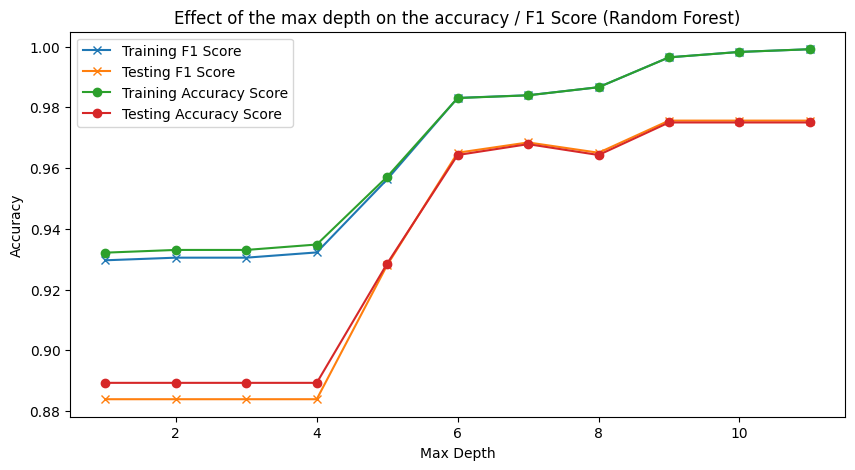

In [38]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_depth, train_f1_scores, marker='x', label="Training F1 Score")
plt.plot(max_depth, test_f1_scores, marker='x', label="Testing F1 Score")
plt.plot(max_depth, train_acc_scores, marker='o', label="Training Accuracy Score")
plt.plot(max_depth, test_acc_scores, marker='o', label="Testing Accuracy Score")

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of the max depth on the accuracy / F1 Score (Random Forest)')
plt.legend()
plt.show()

In [40]:

# List to hold the number of estimators
max_depth = range(1,12)
max_leaf_nodes = range(2,15)

# List to hold the accuracy scores
train_f1_scores = []
test_f1_scores = []
train_acc_scores = []
test_acc_scores = []


# Loop over the number of estimators
for i in max_leaf_nodes:
    rf = RandomForestClassifier(max_depth=10, max_leaf_nodes = i, random_state=42)
    rf.fit(X_train, y_train)

    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)

    train_f1_scores.append(f1_score(y_train, train_pred))
    test_f1_scores.append(f1_score(y_test, test_pred))
    train_acc_scores.append(rf.score(X_train, y_train))
    test_acc_scores.append(rf.score(X_test, y_test))



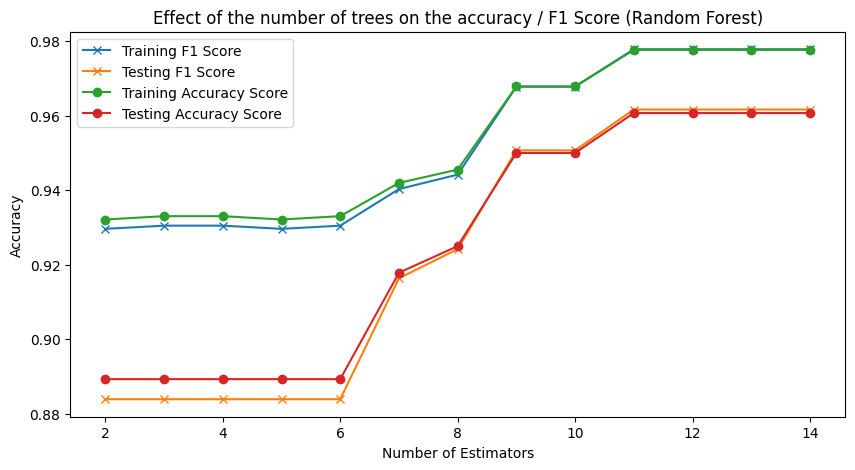

In [42]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_leaf_nodes, train_f1_scores, marker='x', label="Training F1 Score")
plt.plot(max_leaf_nodes, test_f1_scores, marker='x', label="Testing F1 Score")
plt.plot(max_leaf_nodes, train_acc_scores, marker='o', label="Training Accuracy Score")
plt.plot(max_leaf_nodes, test_acc_scores, marker='o', label="Testing Accuracy Score")

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of the number of trees on the accuracy / F1 Score (Random Forest)')
plt.legend()
plt.show()

#### Grid-Search (Random Forest)
 We have run a few simulations above to understand the operation of the models in terms of the hyperparameters of max depth of the tree and the min samples per leaf. We used Grid Search Cross Validation to scan across these parameters to find the best fitting model.

In [362]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param = {'max_depth': max_depth, 'max_leaf_nodes':max_leaf_nodes}
clf = GridSearchCV(rf, param)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Best Estimator:', clf.best_estimator_)
print('Best Score:',clf.best_score_)

Best Estimator: RandomForestClassifier(max_depth=10, max_leaf_nodes=28)
Best Score: 0.9866071428571429


In [363]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[131   9]
 [  0 140]]



### Confusion Matrix
||||
|-|-|-|
||131 (TP)|9 (FP)|
||0 (FN)|140 (TN)|

# Results
In each of these sections, the Random Forest Classifier created a better model where the CV score was 0.9866.

## Decision Tree
Based on the data we have found the various data that needs to be done for the following. After running a grid search based on the two hyperparameters of max depth and max_leaf_nodes; we find that the best model with the parameters provided is *max_depth* = 9 and *min_sample_leaf* = 2 with a CV score of 0.984. This provides us a pretty accurate model of the data.

### Confusion Matrix
||||
|-|-|-|
||127 (TP)|13 (FP)|
||0 (FN)|140 (TN)|

## Random Forest
Based on the data we have found the various data that needs to be done for the following. After running a grid search on the Random Forest Classifier we ran it against the two hyperparameters of max depth and *max_leaf_nodes*; we find that the best model with the parameters provided is *max_depth* = 10 and *min_sample_leaf* = 28 with a CV score of 0.9866. This provides us a pretty accurate model.

### Confusion Matrix
||||
|-|-|-|
||131 (TP)|9 (FP)|
||0 (FN)|140 (TN)|


# Discussion

The decision tree classifier was identified as the best estimator in the given machine learning problem, yielding the highest cross-validation score. The optimal hyperparameters for this model were found to be a maximum depth of 10 and a minimum of 28 samples per leaf. The maximum depth of 10 suggests that the model allowed for considerable branching to capture complex patterns in the data. The minimum samples per leaf of 28 helped to limit overfitting, ensuring that each leaf node had at least two instances from the dataset. As a result, this configuration achieved an impressive performance score of approximately 0.985, indicating a very high predictive accuracy. This model's outstanding performance suggests that it could provide highly accurate predictions when applied to unseen data, assuming that future data is similarly distributed as the training set used.

## Concerns / Improvements
After getting into the data and having really spent a number of hours, I felt that I might want to work with a different dataset. However that would not make sense as in the real world, the change that could be made is either further data collection or adding further parameters to the dataset. However this is not always a realistic convenience and thus using what is left is important.

What we find here in this data, is not ready for production by any means. Following are some of the reasons of why I think this to be true.



### Data
Since the data is based on one hospital in one location,with little less than 1k samples, I would not use the model to make a decision without trying to create a larger sampleset to confirm the model before order I'd consider using the model in a cancer situation like this. However it does beg to ask the question, do these results change.

**Number of samples**: In a cervical cancer, I think it would be better to collect a larger sample of data from multiple sources. May it be other hospitals in other cities or other countries it would be good.

**Key Variables Missing**: In any medical data, it would be wise to collect race as certain genetic factors do play a role in certain medical condition.

**Abstracting error**: there might be a bias in how the data is abstracted from the medical record. It may look quite different than from another country simply taking into consideration the definition or specific

**Quality of Data**: I am having a little second guess on the quality of this dataset since it came from the UCI Machine Learning Databank. This just might happen to be more real world data than I would have expected; yet I can also see that it does.



#### Other ways to improve
**Diversity of data** - As discussed above, the dataset is too small to really gain insight. The dataset would be large enough if the model was to be deployed within only the particular hospital and perhaps the local area. Hut it would be difficult to justify a model that worked for the entire female population.

**Further Model Refinement** - I'm a bit sceptical about the high F1 score that the model had given. However I think the model will need to be a bit more specific. Since we are predicting if one has cancer, it would behoove us to consider decreasing the true negatives within the dataset.

**Feature Engineering**
There might be some scaling to features that could be done in order to better understand the regression that this model may give us.

**Model Tuning**
There are other hyperparameters that can be used to further analyze the best fit for the dataset that should be tried to further understand if there isn't more information that can be contained within a dataset.

Overall the project provides some experience in a dataset with more categorical information. I was a bit uncomfortable with categorical information as opposed continuous data.  I do have to admit that it is good to be able to do a project like this to gain better understanding of the entire process and the up and downs that it can take to do a proper model building exercise.

# References
* [1] American Cancer Society. (2021). What Causes Cervical Cancer? Retrieved from https://www.cancer.org/cancer/cervical-cancer/causes-risks-prevention/what-causes.html

* [2] National Cancer Institute. (2021). Cervical Cancer Treatment (PDQ®)–Patient Version. Retrieved from https://www.cancer.gov/types/cervical/patient/cervical-treatment-pdq

* [3] Centers for Disease Control and Prevention. (2021). Cervical Cancer is Preventable. Retrieved from https://www.cdc.gov/cancer/cervical/basic_info/prevention.htm

* [4] World Health Organization. (2020). Comprehensive Cervical Cancer Control: A Guide to Essential Practice. Retrieved from https://www.who.int/publications/i/item/9789241548953

* [5] Fernandes, Cardoso, and Fernandes. (2017). Cervical cancer (Risk Factors). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.

* [6] Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). An introduction to statistical learning : with applications in R. New York :Springer,

* [7] Hastie, Trevor,, et al. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd ed. New York, Springer, 2009.